# Earthquake Model

#### Import the pre-made model:

In [1]:
import sys
sys.path.append('..')
from tests import get_example_model

model=get_example_model('earthquake')

##### This model has the following structure and CPDs:
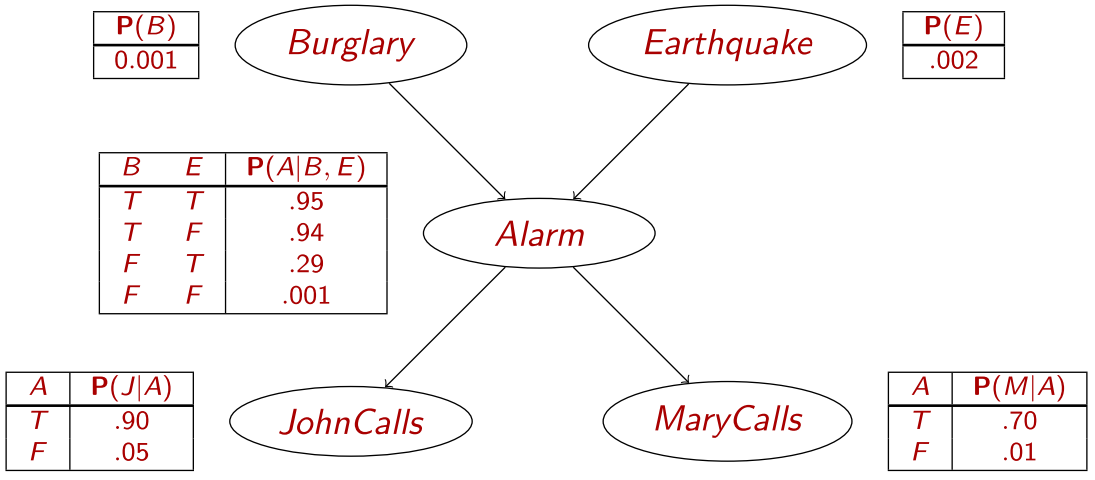

#### Let's check the model structure:

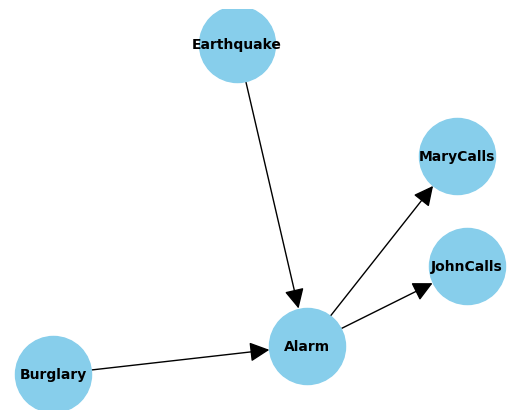

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

edges = model.edges()
G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(5,4))

pos = nx.spiral_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=3000, node_color="skyblue", font_size=10, arrowsize=30)

#### Let's check the CPDs:

In [3]:
for cpd in model.get_cpds():
    pass
    print(f"CPD of {cpd.variable}: \n{cpd}")

CPD of Burglary: 
+-------------+-------+
| Burglary(0) | 0.001 |
+-------------+-------+
| Burglary(1) | 0.999 |
+-------------+-------+
CPD of Earthquake: 
+---------------+-------+
| Earthquake(0) | 0.002 |
+---------------+-------+
| Earthquake(1) | 0.998 |
+---------------+-------+
CPD of Alarm: 
+------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(0)   | Burglary(0)   | Burglary(1)   | Burglary(1)   |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.95          | 0.94          | 0.29          | 0.001         |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.05          | 0.06          | 0.71          | 0.999         |
+------------+---------------+---------------+---------------+---

## Queries

#### At this point, let's compare the queries resulting from the standard variable elimination by `pgmpy` and the Gibbs sampling implemented

In [4]:
from pgmpy.inference import VariableElimination
from inference import GibbsSampling

inference = VariableElimination(model)
gibbs = GibbsSampling(model)

In [5]:
q1={'variables':[
        'Earthquake',
        'Burglary',
        ],
    'evidence':{
        'JohnCalls':1,
        'MaryCalls':1,
        }}
print(f'Variable Elimination:\n{inference.query(**q1)}')
print(f'Gibbs Sampling:\n{gibbs.query(**q1)}')

Variable Elimination:
+---------------+-------------+----------------------------+
| Earthquake    | Burglary    |   phi(Earthquake,Burglary) |
+===============+=============+============================+
| Earthquake(0) | Burglary(0) |                     0.0000 |
+---------------+-------------+----------------------------+
| Earthquake(0) | Burglary(1) |                     0.0014 |
+---------------+-------------+----------------------------+
| Earthquake(1) | Burglary(0) |                     0.0001 |
+---------------+-------------+----------------------------+
| Earthquake(1) | Burglary(1) |                     0.9985 |
+---------------+-------------+----------------------------+
Gibbs Sampling:
+-------------+---------------+----------------------------+
| Burglary    | Earthquake    |   phi(Burglary,Earthquake) |
+=============+===============+============================+
| Burglary(0) | Earthquake(0) |                     0.0000 |
+-------------+---------------+----------------

In [6]:
q2={'variables':[
        'JohnCalls',
        ],
    'evidence':{
        'MaryCalls':1,
        }}
print(f'Variable Elimination:\n{inference.query(**q2)}')
print(f'Gibbs Sampling:\n{gibbs.query(**q2)}')

Variable Elimination:
+--------------+------------------+
| JohnCalls    |   phi(JohnCalls) |
+==============+==================+
| JohnCalls(0) |           0.0506 |
+--------------+------------------+
| JohnCalls(1) |           0.9494 |
+--------------+------------------+
Gibbs Sampling:
+--------------+------------------+
| JohnCalls    |   phi(JohnCalls) |
+==============+==================+
| JohnCalls(0) |           0.0535 |
+--------------+------------------+
| JohnCalls(1) |           0.9465 |
+--------------+------------------+



In [7]:
q3={'variables':[
        'Burglary',
        'Alarm'
        ],
    'evidence':{
        'MaryCalls':1,
        }}
print(f'Variable Elimination:\n{inference.query(**q3)}')
print(f'Gibbs Sampling:\n{gibbs.query(**q3,rounding=6)}')

Variable Elimination:
+-------------+----------+-----------------------+
| Burglary    | Alarm    |   phi(Burglary,Alarm) |
+=============+==========+=======================+
| Burglary(0) | Alarm(0) |                0.0003 |
+-------------+----------+-----------------------+
| Burglary(0) | Alarm(1) |                0.0001 |
+-------------+----------+-----------------------+
| Burglary(1) | Alarm(0) |                0.0005 |
+-------------+----------+-----------------------+
| Burglary(1) | Alarm(1) |                0.9992 |
+-------------+----------+-----------------------+
Gibbs Sampling:
+-------------+----------+-----------------------+
| Burglary    | Alarm    |   phi(Burglary,Alarm) |
+=============+==========+=======================+
| Burglary(0) | Alarm(0) |              0.000340 |
+-------------+----------+-----------------------+
| Burglary(0) | Alarm(1) |              0.000020 |
+-------------+----------+-----------------------+
| Burglary(1) | Alarm(0) |              0.00